In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from time import time
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

<ipython-input-1-11202c4d6e85>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
transaction_data = pd.read_csv('../datasets/transaction_data.tsv', sep='\t')

In [3]:
stocks = {}
for ticker in transaction_data['TICKER'].unique():
    stocks[ticker] = transaction_data[transaction_data['TICKER'] == ticker]

In [4]:
def get_arima_prediction(ticker, future_observations_count = 10):
    start = time()
    df = stocks[ticker]
    
    df_train = df['PRC'].values[:df.shape[0] - future_observations_count]
    df_test = df['PRC'].values[df.shape[0] - future_observations_count:]
    
    history = [x for x in df_train]
    model_predictions = []
    
    for time_point in range(future_observations_count):
        model = ARIMA(history, order=(7,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        y_hat = output[0]
        model_predictions.append(y_hat)
        history.append(y_hat)
    
    print(f"{time()-start} s")
    plt.plot([i for i in range(df.shape[0])], list(df_train) + model_predictions, color='blue')
    plt.plot([i for i in range(df.shape[0])], list(df_train) + list(df_test), color='green')
    plt.title(f'{ticker} Prices Prediction')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.show()

2.298201084136963 s


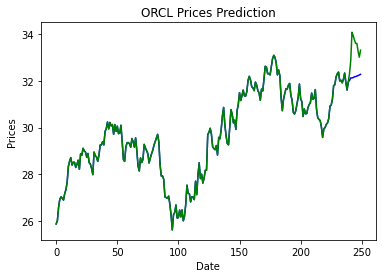

2.6790831089019775 s


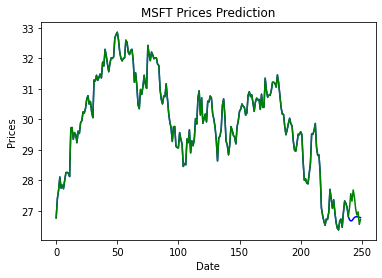

2.842830181121826 s


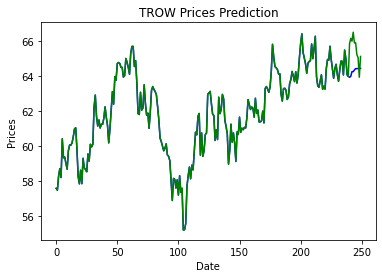

3.4085960388183594 s


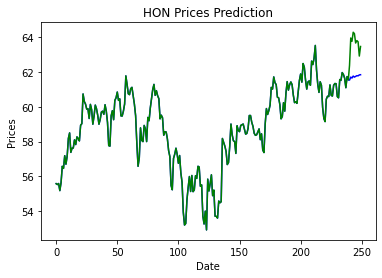

KeyboardInterrupt: 

In [5]:
for ticker in stocks.keys():
    get_arima_prediction(ticker, 10)